# GOOGLE PLAY STORE DATASET
1) Problem statement. Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc. 2) Data Collection.

The data consists of 20 column and 10841 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reasd the file 
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# shape 
df.shape
# 10841 -> rows 
# 13-colm 

(10841, 13)

In [4]:
# summery 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# check missing value 
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# reviews has missing vlaue ->1474
# content rating ->>1


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [88]:
# now we handeled the reviees
df.head()
# revies-> object type e ache 

# convert it to int 
df_copy['Reviews'] = df_copy['Reviews'].astype('int')

In [89]:
# check korbo reviews e kotai kothai non numeric value ache 
df_copy['Reviews'].str.isnumeric()

AttributeError: Can only use .str accessor with string values!

In [87]:
# non numeric 
df[~df['Reviews'].str.isnumeric()]

# only ekta non numeric value ache 

# so we can dlt this row 
df.drop(10472,inplace=True)

# check ache ki nei 

df[~df['Reviews'].str.isnumeric()]

AttributeError: Can only use .str accessor with string values!

In [81]:
# now  convert the reviews colm to int 
df['Reviews'] = df['Reviews'].astype('int')

In [15]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# amra main tai change korbo na 
#ekta copy create korbo 
df_copy = df.copy()

In [21]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [85]:
# now play with size 
df_copy['Size'].value_counts()

0.0        1695
11000.0     198
12000.0     196
14000.0     194
13000.0     191
           ... 
429.0         1
200.0         1
460.0         1
728.0         1
619.0         1
Name: Size, Length: 460, dtype: int64

In [83]:
# size -> M and value_counts k
# M->000 dara replace korbo 
# k take faka replace korbo 
df_copy['Size'] = df_copy['Size'].str.replace('M','000')
df_copy['Size'] = df_copy['Size'].str.replace('k','')

# convert it to float
df_copy['Size'] = df_copy['Size'].astype('float')

df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [84]:
# find the non numeric value 
df_copy['Size'] = df_copy['Size'].str.replace('Varies with device','0')
df_copy['Size']

# now convert this to flaot
df_copy['Size'] = df_copy['Size'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [9]:
df_copy


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:
# install 
df_copy['Installs']
# 10,000+ -> , and + take faka diye replace korte hbe 


0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [47]:
# loop lagabo 
char_to_remove =[',','+','$']
colm_to_check= ['Installs','Price']
for char in char_to_remove:
    for colm in colm_to_check:
        df_copy[colm] = df_copy[colm].str.replace(char,'')
    

/tmp/ipykernel_84/1120436654.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy[colm] = df_copy[colm].str.replace(char,'')


In [91]:
df_copy["Installs"].value_counts()
df_copy['Price'].value_counts()

0.00     10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [92]:
# then convert price and install into int
df_copy['Installs'] = df_copy["Installs"].astype(int)

df_copy['Price'] = df_copy["Price"].astype(float)

In [93]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
# last update 
df_copy['Last Updated'].dtypes

dtype('O')

In [18]:
# convert it to datetime 
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

df_copy.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [19]:
# now seperate date month and yr 
df_copy['updated_month'] = df_copy['Last Updated'].dt.month
df_copy['updated_year'] = df_copy['Last Updated'].dt.year
df_copy['updated_day'] = df_copy['Last Updated'].dt.day


In [20]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_month,updated_year,updated_day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,2018,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,2018,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6,2018,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6,2018,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,7,2017,25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,7,2018,6
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,1,2017,20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,1,2015,19


# EDA

In [21]:
# mising value check 
# duplicated check 
df_copy[df_copy.duplicated('App')]
# 483 ta duplicated value ache 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_month,updated_year,updated_day
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,0.0,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2,2018,26
236,Box,BUSINESS,4.2,159872,0.0,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,7,2018,31
239,Google My Business,BUSINESS,4.4,70991,0.0,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,7,2018,24
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,7,2018,20
261,join.me - Simple Meetings,BUSINESS,4.0,6989,0.0,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,7,2018,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,2,2016,25
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,7,2018,6
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,3,2018,24
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,7,2018,30


In [22]:
# deelte all the duplicate value 
# app er respect jeta duplicate seta dlt korbo first take rekhe 
df_copy.drop_duplicates('App' , keep='first',inplace=True)

# check 
df_copy.duplicated().sum()

0

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  updated_month   9659 non-null   int64         
 14  updated_year    9659 non-null   int64         
 15  upd

In [24]:
# dlt the last updated 
df_copy.drop('Last Updated',axis = 1,inplace=True)

In [25]:
# segregate cat data and numerical data 
cat_feat = [i for i in df_copy.columns if df_copy[i].dtype=='O']
num_feat = [i for i in df_copy.columns if df_copy[i].dtype!='O']

In [27]:
cat_feat


['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [114]:
# visualisation
# type 
mode = df_copy['Type'].mode()


0    Free
Name: Type, dtype: object

In [28]:
df_copy['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

<AxesSubplot: xlabel='Type', ylabel='Count'>

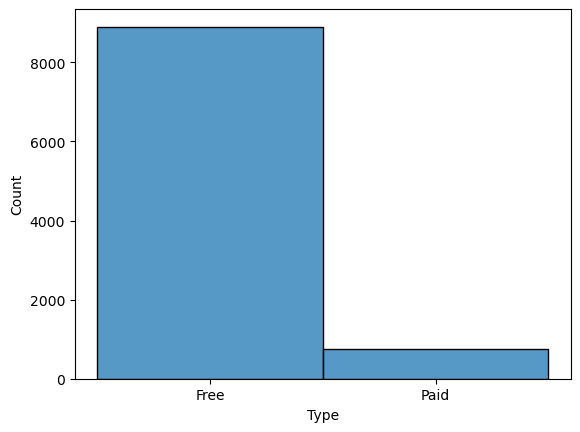

In [29]:
sns.histplot(data=df_copy, x='Type',bins=30)

In [31]:
num_feat

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'updated_month',
 'updated_year',
 'updated_day']

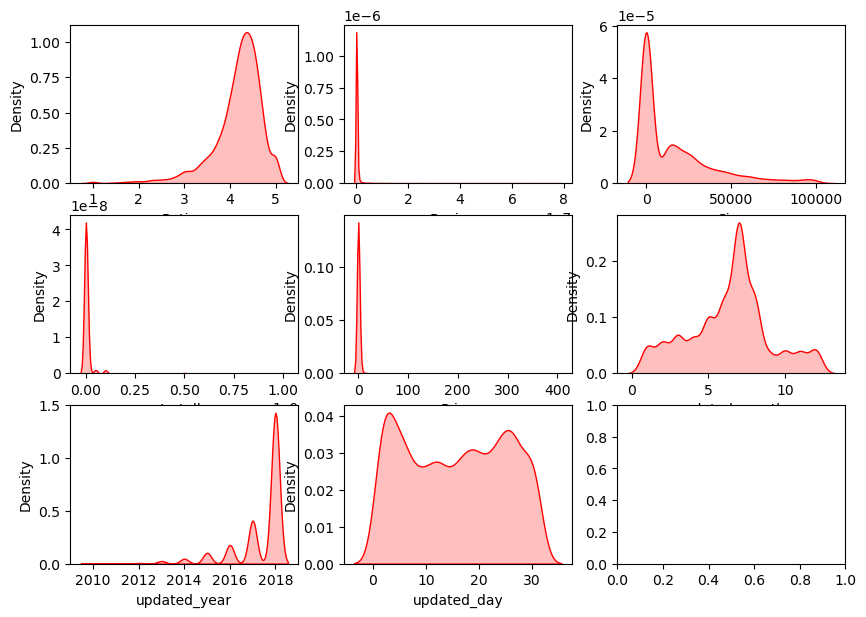

In [32]:
# all numerical feat er histpplt 
num_feat
plt.subplots(3,3,figsize=(10,7))
for i in range(0,len(num_feat)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df_copy,x=df_copy[num_feat[i]] ,color='red',fill=True)
    plt.xlabel(num_feat[i])

In [34]:
# all cat feature er graph
cat_feat

# current var and ANDROID VER  ergulo num feature so plot korbo na

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [39]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,updated_month,updated_year,updated_day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,7,2017,25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,1.0,4.1 and up,7,2018,6
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,1,2017,20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,1,2015,19


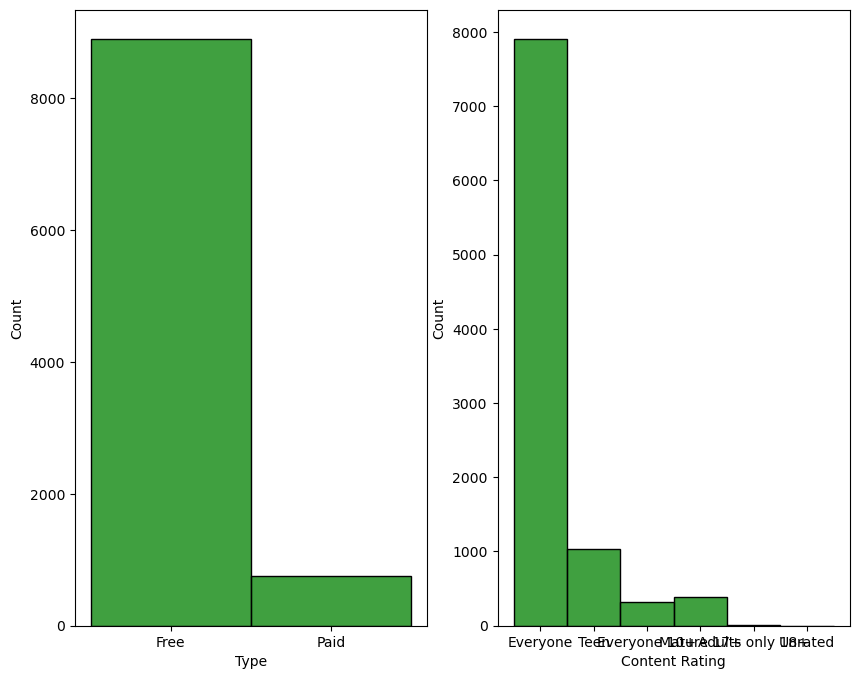

In [49]:
# type and content rating er graph 
cat = ['Type' ,'Content Rating']
plt.subplots(1,2,figsize=(10,8))
for i in range(0,len(cat)):
    plt.subplot(1,2,i+1)
    sns.histplot(data = df_copy , x=df_copy[cat[i]] , color='green')




In [50]:
df_copy["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

# what is the top 10 catagory 

<AxesSubplot: ylabel='Category'>

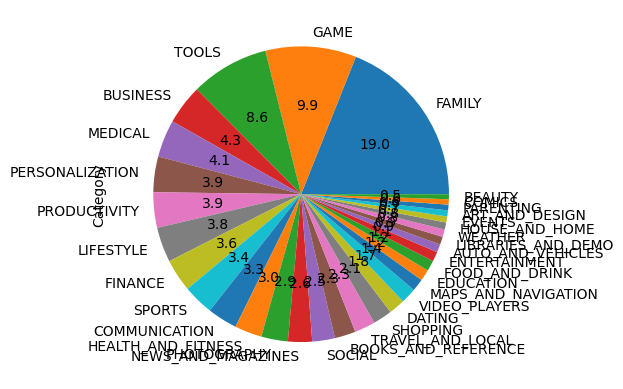

In [53]:
df_copy["Category"].value_counts().plot.pie(autopct='%1.1f')

In [4]:
df_copy = df.copy()

In [5]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df_copy['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [11]:
df_copy[df_copy['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# delete this row cause cat dont have numeric value 
df_copy.drop(10472,inplace=True)

In [13]:
df_copy[df_copy['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
df_copy['Category'].value_counts()

# most populat app catagory ->FAMILY 

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: ylabel='Category'>

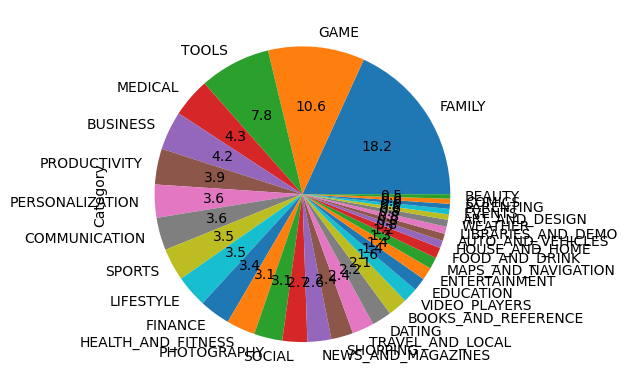

In [16]:
# PIE CHART OF THIS CATEGORY 
df_copy['Category'].value_counts().plot.pie(autopct='%1.1f')

In [26]:
# top 10 app catagory 
# 1. value counts theke 
# pie chart theke 
# top 10 er bar plot 
df_copy['Category'].value_counts()

# dataframe e convert kor 
category = pd.DataFrame(df_copy['Category'].value_counts())

In [31]:
# rename the column 
category.rename(columns={'Category':'counts'},inplace=True)

In [40]:
# top 10 bar korbo 
# rename the column 
category.rename(columns={'Category':'counts'})[0:10]



,counts
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


<AxesSubplot: ylabel='counts'>

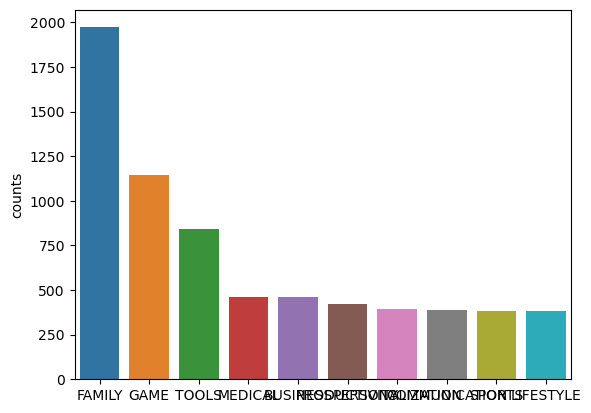

In [45]:
#  bar plot of top 10
sns.barplot(data=category[0:10],x=category.index[0:10] , y = 'counts')

In [55]:
# which catagory has largest number pf install
df_copy['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: xlabel='Category', ylabel='Installs'>

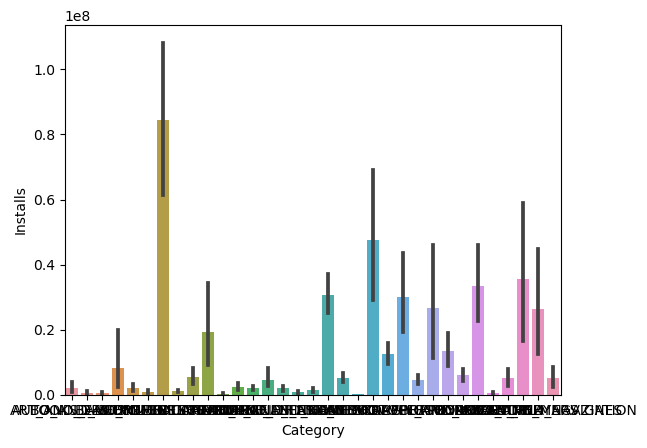

In [56]:
# plot btw cat and installs 
sns.barplot(data=df_copy,x=df_copy['Category'] , y=df_copy['Installs'])

In [57]:
df_copy


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [67]:
df_copy.groupby(['Category'])['Installs'].sum()
# sob cat er sum berie jabe 


Category
ART_AND_DESIGN           124338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1921469576
BUSINESS                1001914865
COMICS                    56086150
COMMUNICATION          32647276251
DATING                   264310807
EDUCATION                871452000
ENTERTAINMENT           2869160000
EVENTS                    15973161
FAMILY                 10258263505
FINANCE                  876648734
FOOD_AND_DRINK           273898751
GAME                   35086024415
HEALTH_AND_FITNESS      1583072512
HOUSE_AND_HOME           168712461
LIBRARIES_AND_DEMO        62995910
LIFESTYLE                537643539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   53257437
NEWS_AND_MAGAZINES      7496317760
PARENTING                 31521110
PERSONALIZATION         2325494782
PHOTOGRAPHY            10088247655
PRODUCTIVITY           14176091369
SHOPPING                3247848785
SOCIAL                 14069867902
SPORTS     

In [68]:
# sort the values in descending orsder 
group_cat = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
group_cat

Category
GAME                   35086024415
COMMUNICATION          32647276251
PRODUCTIVITY           14176091369
SOCIAL                 14069867902
TOOLS                  11452771915
FAMILY                 10258263505
PHOTOGRAPHY            10088247655
NEWS_AND_MAGAZINES      7496317760
TRAVEL_AND_LOCAL        6868887146
VIDEO_PLAYERS           6222002720
SHOPPING                3247848785
ENTERTAINMENT           2869160000
PERSONALIZATION         2325494782
BOOKS_AND_REFERENCE     1921469576
SPORTS                  1751174498
HEALTH_AND_FITNESS      1583072512
BUSINESS                1001914865
FINANCE                  876648734
EDUCATION                871452000
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                537643539
WEATHER                  426100520
FOOD_AND_DRINK           273898751
DATING                   264310807
HOUSE_AND_HOME           168712461
ART_AND_DESIGN           124338100
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
MEDICAL    

In [72]:
cat_install = pd.DataFrame(group_cat)
cat_install

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


<AxesSubplot: xlabel='Category', ylabel='Installs'>

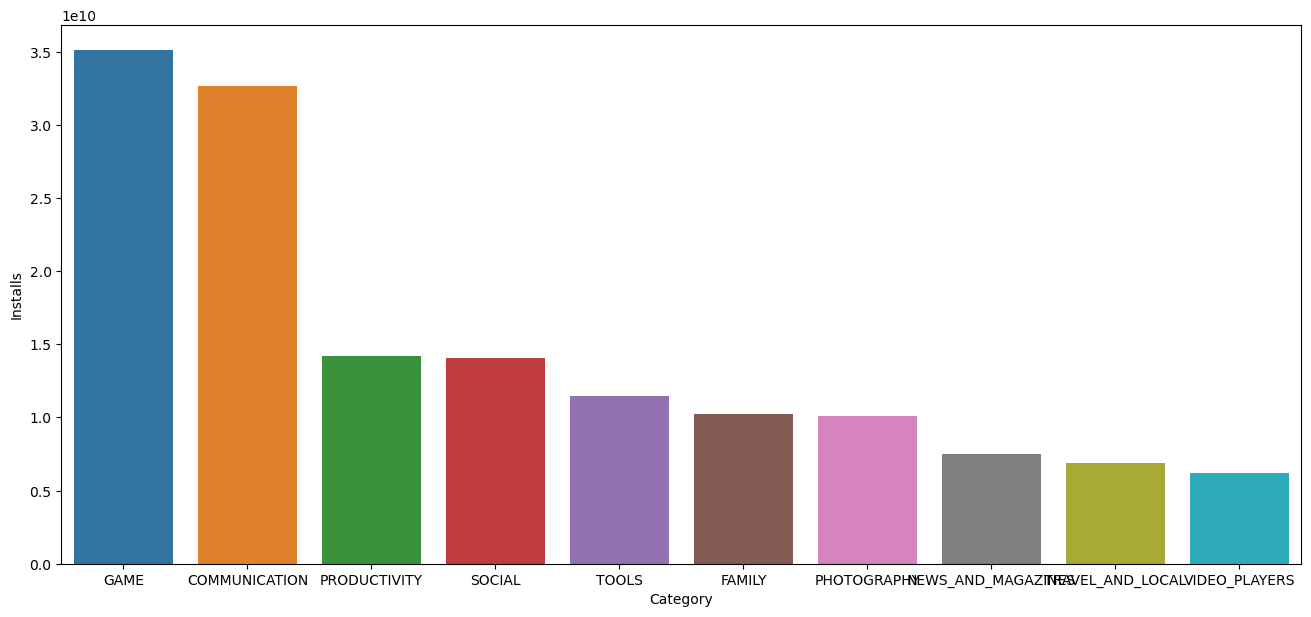

In [76]:
# top 10 bar e plot kor
plt.figure(figsize=(16,7))
sns.barplot(data=cat_install[0:10] , x =cat_install.index[0:10] , y = 'Installs')

In [90]:
# corealtion 
df_copy.corr()

/tmp/ipykernel_84/3406847550.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.049136,0.051355,-0.021903
Reviews,0.068141,1.000000,0.072362,0.643122,-0.009667
Size,0.049136,0.072362,1.000000,0.008261,-0.014655
Installs,0.051355,0.643122,0.008261,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.014655,-0.011689,1.000000


In [94]:
df_copy['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [97]:
# app size er avg 
df_copy['Size'].describe()

count     10840.000000
mean      16517.877777
std       23199.242588
min           0.000000
25%           3.100000
50%         267.500000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [ ]:
describe